WEEK1: COMPLETE ML PIPELINE

1.Impoer Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

2.Create Sample Dataset

In [11]:
data = { "Age" : [22,25,47,52,46,56,55,60],
         "Salary" : [20000,25000,50000,52000,48000,60000,58000,62000],
         "City" : ["Hybd","Bglr","Chennai","Hybd","Bgrl","Chennai","Hybd","Bglr"],
         "Purchased" : [0,0,1,1,1,1,0,1]}
df =pd.DataFrame(data)
print(df)

   Age  Salary     City  Purchased
0   22   20000     Hybd          0
1   25   25000     Bglr          0
2   47   50000  Chennai          1
3   52   52000     Hybd          1
4   46   48000     Bgrl          1
5   56   60000  Chennai          1
6   55   58000     Hybd          0
7   60   62000     Bglr          1


3.Basic EDA(Encoding Dataset Analization)

In [15]:
print("\nShape",df.shape)
print("\nInfo",df.info)
print("\nDescribe",df.describe)


Shape (8, 4)

Info <bound method DataFrame.info of    Age  Salary     City  Purchased
0   22   20000     Hybd          0
1   25   25000     Bglr          0
2   47   50000  Chennai          1
3   52   52000     Hybd          1
4   46   48000     Bgrl          1
5   56   60000  Chennai          1
6   55   58000     Hybd          0
7   60   62000     Bglr          1>

Describe <bound method NDFrame.describe of    Age  Salary     City  Purchased
0   22   20000     Hybd          0
1   25   25000     Bglr          0
2   47   50000  Chennai          1
3   52   52000     Hybd          1
4   46   48000     Bgrl          1
5   56   60000  Chennai          1
6   55   58000     Hybd          0
7   60   62000     Bglr          1>


4.Visualization (EDA)

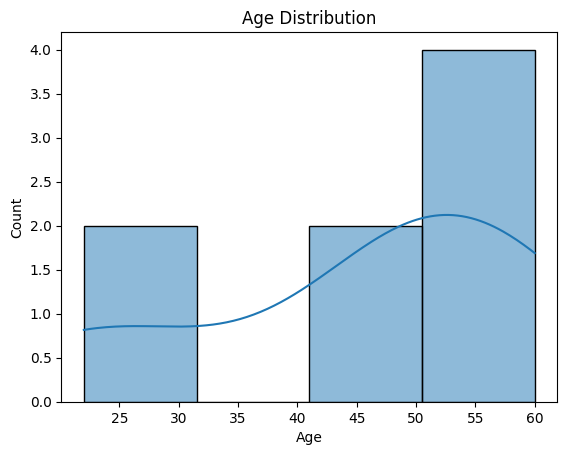

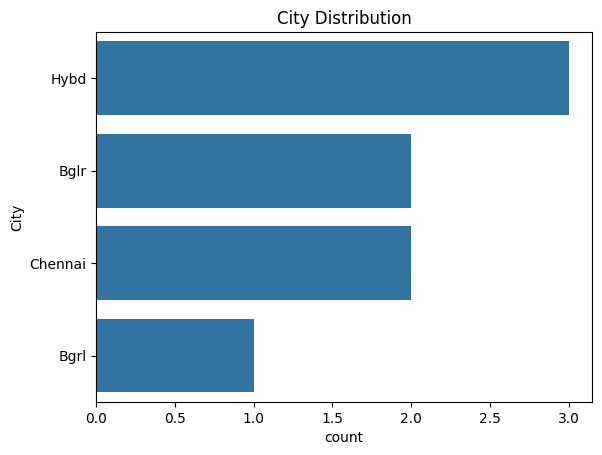

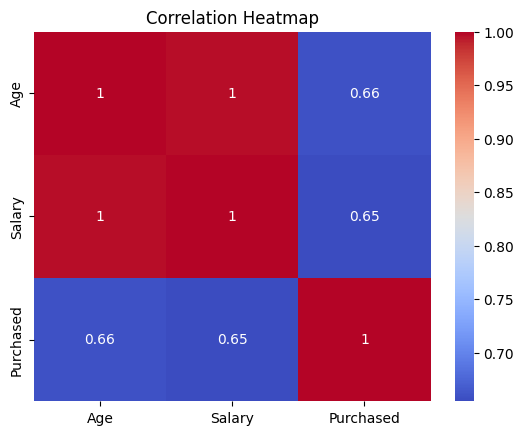

In [29]:
sns.histplot(df["Age"],kde=True)
plt.title("Age Distribution")
plt.show()

sns.countplot(df["City"])
plt.title("City Distribution")
plt.show()

sns.heatmap(df.select_dtypes(include="number").corr(), annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

5.Feature Encoding

In [45]:
#Label Encoding
le=LabelEncoder()
df["Purchased"]=le.fit_transform(df["Purchased"])
print(df)

#One-Hot Encoding
df=pd.DataFrame(data)
df=pd.get_dummies(df,columns=["City"],dtype=int,drop_first=True)
print("\nAfter Encoding",df)

   Age  Salary  Purchased  City_Bgrl  City_Chennai  City_Hybd
0   22   20000          0          0             0          1
1   25   25000          0          0             0          0
2   47   50000          1          0             1          0
3   52   52000          1          0             0          1
4   46   48000          1          1             0          0
5   56   60000          1          0             1          0
6   55   58000          0          0             0          1
7   60   62000          1          0             0          0

After Encoding    Age  Salary  Purchased  City_Bgrl  City_Chennai  City_Hybd
0   22   20000          0          0             0          1
1   25   25000          0          0             0          0
2   47   50000          1          0             1          0
3   52   52000          1          0             0          1
4   46   48000          1          1             0          0
5   56   60000          1          0             1    

6.Feature/Target Split

In [50]:
x=df.drop("Purchased",axis=1)
y=df["Purchased"]

7.Train-Test Split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

8.Feature Scaling

In [71]:
#Standard Scaler
scaler = StandardScaler()
scaler.fit(x_train)    #fit only on train data
#x_train_scaled=scaler.transform(x_train)
#x_test_scaled=scaler.transform(x_test)
x_train_scaled=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns,index=x_train.index)
x_test_scaled=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns,index=x_test.index)
print("\n Scaler Trained Data(StanderdScaler):\n",x_train_scaler)
print("\n Scaler Test Data(StandardScaler):\n",x_test_scaler)



 Scaler Trained Data(StanderdScaler):
 [[-2.05963139 -2.09318974 -0.4472136  -0.4472136   1.        ]
 [ 1.07100832  1.00965623 -0.4472136  -0.4472136  -1.        ]
 [ 0.          0.12312881 -0.4472136   2.23606798 -1.        ]
 [-0.08238526 -0.02462576  2.23606798 -0.4472136  -1.        ]
 [ 0.41192628  0.27088338 -0.4472136  -0.4472136   1.        ]
 [ 0.65908204  0.71414709 -0.4472136  -0.4472136   1.        ]]

 Scaler Test Data(StandardScaler):
 [[-1.81247562 -1.72380332 -0.4472136  -0.4472136  -1.        ]
 [ 0.7414673   0.86190166 -0.4472136   2.23606798 -1.        ]]


In [72]:
#MinMax Scaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x.columns)

9.Final Output

In [73]:
print("\n Scaler Trained Data(MinMaxScale):",x_train_scaled)
print("\n Scaler Test Data(MinMaxScaler)",x_test_scaled)
print("\n Pipeline created successfully")



 Scaler Trained Data(MinMaxScale):         Age    Salary  City_Bgrl  City_Chennai  City_Hybd
0  0.000000  0.000000        0.0           0.0        1.0
1  1.000000  1.000000        0.0           0.0        0.0
2  0.657895  0.714286        0.0           1.0        0.0
3  0.631579  0.666667        1.0           0.0        0.0
4  0.789474  0.761905        0.0           0.0        1.0
5  0.868421  0.904762        0.0           0.0        1.0

 Scaler Test Data(MinMaxScaler)         Age    Salary  City_Bgrl  City_Chennai  City_Hybd
0  0.078947  0.119048        0.0           0.0        0.0
1  0.894737  0.952381        0.0           1.0        0.0

 Pipeline created successfully
